# DataQuest Project: Analyze CIA Factbook with SQL
This is the 8th DataQuest project. It is very short and basic. In it data from a database containing the CIA factbook, which is a dataset containing basic information about all countries in the world is analyzed. The main focus of this project is for the student to learn to use `SQL` via the `sqlite3` module in python in Jupyter Notebooks. The `SQL` queries are written as strings and then analyzed using the `read_sql_query()` method from the `Pandas` module. This allows for the analysis of `SQL` tables in pandas.

### Setup:

In [2]:
# imports and first query:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
conn = sqlite3.connect('factbook.db')
%matplotlib inline

# query to find table name
q = 'select * from sqlite_master where type = "table";'
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


### First look at the dataset:

In [3]:
q2 = 'select * from facts limit 5'
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


### Finding the maximum and minimum populations in the list to look for bad data:

In [4]:
q3 = '''select min(population) min_pop, max(population) max_pop,
min(population_growth) min_pop_gr,max(population_growth) max_pop_gr
from facts'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_gr,max_pop_gr
0,0,7256490011,0.0,4.02


In [5]:
q4 = '''select name country, population from facts
where population = 0'''
pd.read_sql_query(q4, conn)

,country,population
0,Antarctica,0


This actually makes sense. But is Antarctica a country?

In [6]:
q5 = '''select name country, population from facts
where population = (select max(population) from facts)'''
pd.read_sql_query(q5, conn)

,country,population
0,World,7256490011


This also makes sense. Although the world is also not a country.

### Plot histograms to get a better idea of the dataset:

C:\Users\apist\.conda\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249F771A648>,
      dtype=object)

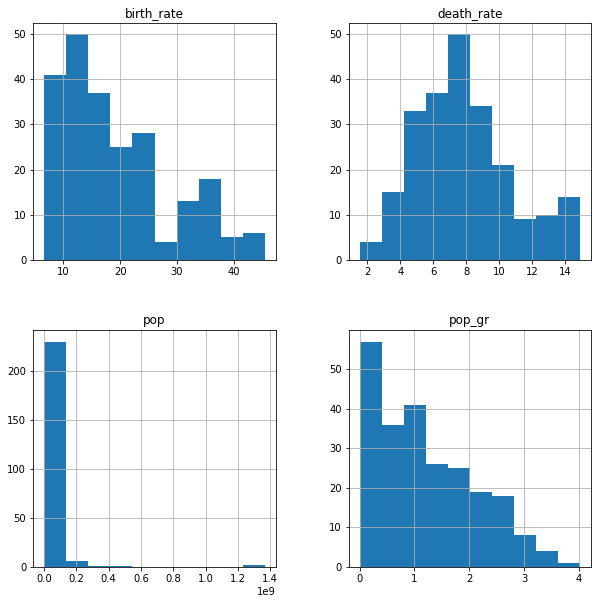

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

q6 = '''select population pop, population_growth pop_gr, birth_rate, death_rate
from facts
where population not in (0,(select max(population) from facts))'''
# where population in (0,(select max(population from facts)))'''
pd.read_sql_query(q6, conn).hist(ax = ax)

the birthrate seems to be significantly higher than the death rate this is reflected by the population growth being shifted to the right. Countries with a decreasing population like Germany are listed between 0 and 1.

### Showing the population growth of Germany

In [13]:
q7 = '''select population_growth
from facts
where name = "Germany"'''
pd.read_sql_query(q7, conn)

,population_growth
0,0.17


### Querying average population and Area

In [25]:
q8 = '''
SELECT
AVG(population) avg_pop,
AVG(area) avg_area
FROM facts'''
pd.read_sql_query(q8, conn)

,avg_pop,avg_area
0,6.209493e+07,555093.546185


### Querying for countries with above average populations and below average areas

In [26]:
q9 = '''SELECT
name
FROM facts
WHERE population > (SELECT 
                    AVG(population) 
                    FROM facts)
AND
area < (SELECT
            AVG(area)
            FROM facts)
'''
pd.read_sql_query(q9, conn)

,name
0,Bangladesh
1,Germany
2,Japan
3,Philippines
4,Thailand
5,United Kingdom
6,Vietnam


# Summary

This Project was the first introduction to `SQL` and on how to use `Pandas` to effectively analyze `SQL` queries in `Python` using the well established `Pandas DataFrame`  object for further analysis. It has to be said that in `Jupyter Notebooks` the possibility of using the `Jupyter Magic`:
`%%capture
%load_ext sql
%sql sqlite:///factbook.db`
to initialize `SQL` usage in `Jupyter Notebooks` and then using the magic
`%%sql` would have enabled using `SQL` syntax directly in `Jupyter Notebook` cells without directly using `Pandas` at all. For this to work the modules `sqalchemy and ipython-sql` have to be installed. This can be done by running `pip install sqlalchemy # ORM for databases
pip install ipython-sql # SQL magic function`